In [1]:
import cv2

In [2]:
class ImageFeature():
    def __init__(self, filename, image, keypoint, descriptor):
        self.filename = filename
        self.image = image
        self.keypoint = keypoint
        self.descriptor = descriptor

    def get_filename(self):
        return self.filename

    def get_descriptor(self):
        return self.descriptor

    def compare_with(self, image_feature):
        # BFMatcher with default params
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(self.descriptor, image_feature.get_descriptor(), k=2)

        # ratio test
        # 최근접 이웃 2개가 충분히 차이가 있으면 좋은 매칭
        good_match = []
        for m, n in matches:
            if m.distance < 0.5 * n.distance:
                good_match.append([m])

        # 두 이미지 사이에 충분한 수의 좋은 매칭이 있으면 서로 관련된 영상
        return len(good_match) > 15


class SiftFeatureExtractor():
    def __init__(self):
        # Initiate SIFT detector
        self.sift = cv2.xfeatures2d.SIFT_create()

    def get_image_feature_with_filename(self, filename):
        image = cv2.imread(filename)

        # SIFT 특징점 및 기술자 추출
        keypoint, descriptor = self.sift.detectAndCompute(image, None)
        return ImageFeature(filename, image, keypoint, descriptor)

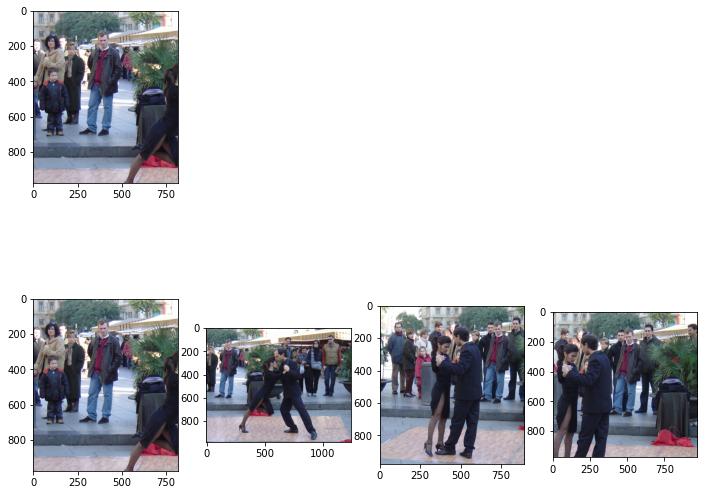

In [4]:
import os
from glob import glob
from matplotlib import pyplot as plt

sift = SiftFeatureExtractor()

# 영상을 검색할 저장소 구성
feature_database = []
# glob() 함수는 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환
for index, path in enumerate(glob("./INRIAPerson/db/*.png")):
    feature_database.append(sift.get_image_feature_with_filename(path))

# 검색할 영상
target_path = "./INRIAPerson/db/crop001001.png"
target = sift.get_image_feature_with_filename(target_path)


found = False
matched = []
# 저장소에서 모든 영상과 비교하여 관련된 영상 찾기
for saved in feature_database:
    associated = target.compare_with(saved)
    if associated:
        found = True
        matched.append(saved)

# 관련된 영상이 있는 경우 영상 출력
if found:
    plt.figure(figsize=(15,15))

    target_image = cv2.imread(target.get_filename())
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,5,1)
    plt.imshow(target_image)

    for index, match in enumerate(matched):
        match_image = cv2.imread(match.get_filename())
        match_image = cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 5, 6+index)
        plt.imshow(match_image)

    plt.plot()